In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

In [3]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [4]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [5]:
df.isnull().mean()*100


Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [6]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [7]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [8]:
X_train.shape

(712, 2)

In [9]:
X_test.shape

(179, 2)

In [10]:
X_train['Age_imputed']=X_train['Age']
X_test['Age_imputed']=X_test['Age']

In [11]:
X_train.tail()

,Age,Fare,Age_imputed
534,30.0,8.6625,30.0
584,NaN,8.7125,NaN
493,71.0,49.5042,71.0
527,NaN,221.7792,NaN
168,NaN,25.9250,NaN


In [12]:
# Sample non-null values from 'Age' column to replace missing values in 'Age_imputed' column for training dataset
missing_indices_train = X_train['Age_imputed'].isnull()  # Boolean array to identify missing values
num_missing_train = missing_indices_train.sum()  # Count the number of missing values
replacement_values_train = X_train['Age'].dropna().sample(num_missing_train, replace=True)  # Sample replacement values
X_train.loc[missing_indices_train, 'Age_imputed'] = replacement_values_train.values  # Assign replacement values to missing entries

# Sample non-null values from 'Age' column to replace missing values in 'Age_imputed' column for test dataset
missing_indices_test = X_test['Age_imputed'].isnull()  # Boolean array to identify missing values
num_missing_test = missing_indices_test.sum()  # Count the number of missing values
replacement_values_test = X_train['Age'].dropna().sample(num_missing_test, replace=True)  # Sample replacement values from training data
X_test.loc[missing_indices_test, 'Age_imputed'] = replacement_values_test.values  # Assign replacement values to missing entries


In [13]:
X_train.tail()

,Age,Fare,Age_imputed
534,30.0,8.6625,30.0
584,NaN,8.7125,29.0
493,71.0,49.5042,71.0
527,NaN,221.7792,23.0
168,NaN,25.9250,2.0


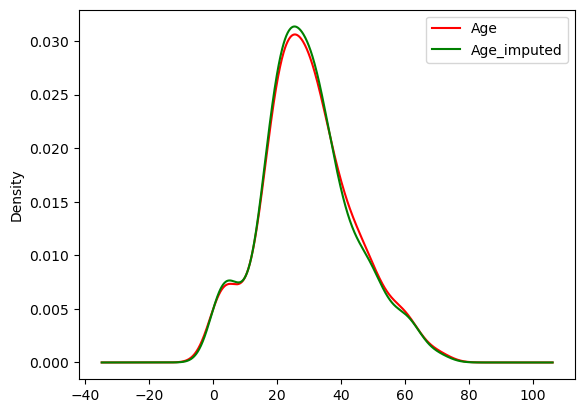

In [14]:
ax=plt.subplot(111)
X_train['Age'].plot.density(ax=ax,color='red')
X_train['Age_imputed'].plot.density(ax=ax,color='green')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [15]:
print('Original variable variance:' ,X_train['Age'].var())
print('Imputed variable variance:' ,X_train['Age_imputed'].var())

Original variable variance: 204.3495133904614
Imputed variable variance: 198.8305522857108


In [16]:
X_train[['Age','Fare','Age_imputed']].cov()

,Age,Fare,Age_imputed
Age,204.349513,71.512440,204.349513
Fare,71.512440,2368.246832,60.670760
Age_imputed,204.349513,60.670760,198.830552


<Axes: >

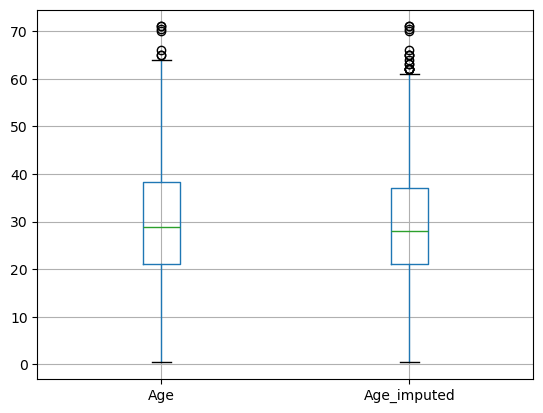

In [17]:
X_train[['Age','Age_imputed']].boxplot()

In [18]:
df2=pd.read_csv('data.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [19]:
df2

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,Gd,TA,266500
1458,NaN,TA,142125


In [20]:
df2.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [21]:
x1=df2
y1=df2['SalePrice']

In [22]:
X1_train,X1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=2)

In [23]:
X1_train.shape

(1168, 3)

In [24]:
X1_train['GarageQual_imputed']=X1_train['GarageQual']
X1_train['FireplaceQu_imputed']=X1_train['FireplaceQu']

In [25]:
X1_train

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
455,TA,TA,175500,TA,TA
863,NaN,TA,132500,TA,NaN
504,Fa,TA,147000,TA,Fa
1413,Gd,TA,257000,TA,Gd
1389,Gd,TA,131000,TA,Gd
...,...,...,...,...,...
466,Po,TA,167000,TA,Po
299,Gd,TA,158500,TA,Gd
493,Fa,TA,155000,TA,Fa
527,Gd,TA,446261,TA,Gd


In [26]:
X1_train['GarageQual_imputed'] = X1_train['GarageQual']
X1_test['GarageQual_imputed'] = X1_test['GarageQual']

X1_train['FireplaceQu_imputed'] = X1_train['FireplaceQu']
X1_test['FireplaceQu_imputed'] = X1_test['FireplaceQu']

In [28]:
# Sample non-null values from 'Age' column to replace missing values in 'Age_imputed' column for training dataset
missing_indices_train = X1_train['GarageQual_imputed'].isnull()  # Boolean array to identify missing values
num_missing_train = missing_indices_train.sum()  # Count the number of missing values
replacement_values_train = X1_train['GarageQual'].dropna().sample(num_missing_train, replace=True)  # Sample replacement values
X1_train.loc[missing_indices_train, 'GarageQual_imputed'] = replacement_values_train.values  # Assign replacement values to missing entries

# Sample non-null values from 'Age' column to replace missing values in 'Age_imputed' column for test dataset
missing_indices_test = X1_test['GarageQual_imputed'].isnull()  # Boolean array to identify missing values
num_missing_test = missing_indices_test.sum()  # Count the number of missing values
replacement_values_test = X1_train['GarageQual'].dropna().sample(num_missing_test, replace=True)  # Sample replacement values from training data
X1_test.loc[missing_indices_test, 'GarageQual_imputed'] = replacement_values_test.values  # Assign replacement values to missing entries


In [29]:
X1_train

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
455,TA,TA,175500,TA,TA
863,NaN,TA,132500,TA,NaN
504,Fa,TA,147000,TA,Fa
1413,Gd,TA,257000,TA,Gd
1389,Gd,TA,131000,TA,Gd
...,...,...,...,...,...
466,Po,TA,167000,TA,Po
299,Gd,TA,158500,TA,Gd
493,Fa,TA,155000,TA,Fa
527,Gd,TA,446261,TA,Gd


In [30]:
#checking the frequency of category in categorical column
temp=pd.concat(
    [X1_train['GarageQual'].value_counts()/len(X1_train['GarageQual'].dropna()),
     X1_train['GarageQual_imputed'].value_counts()/len(X1_train)
   ],axis=1
)
temp.columns=['Original','Imputed']

In [31]:
temp

,Original,Imputed
TA,0.951043,0.948630
Fa,0.037171,0.038527
Gd,0.009973,0.010274
Po,0.000907,0.000856
Ex,0.000907,0.001712


In [32]:
temp=pd.concat(
    [X1_train['FireplaceQu'].value_counts()/len(X1_train['FireplaceQu'].dropna()),
     X1_train['FireplaceQu_imputed'].value_counts()/len(X1_train)
   ],axis=1
)
temp.columns=['Original','Imputed']

In [33]:
temp

,Original,Imputed
Gd,0.494272,0.258562
TA,0.412439,0.215753
Fa,0.040917,0.021404
Po,0.027823,0.014555
Ex,0.024550,0.012842


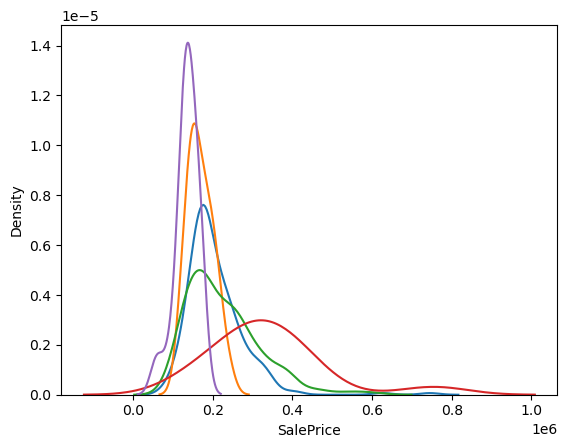

In [34]:
#Before Imputation
for category in X1_train['FireplaceQu'].dropna().unique():
    sns.distplot(X1_train[X1_train['FireplaceQu']== category]['SalePrice'],hist=False,label=category)
plt.show()

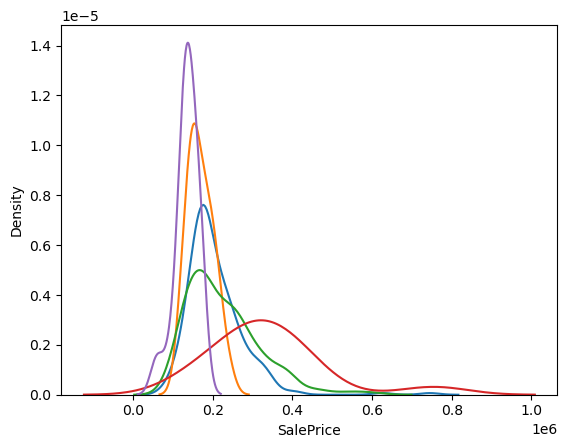

In [35]:
#After Imputation
for category in X1_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X1_train[X1_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()